In [1]:
# 引入第三方类 声明全局变量 
import random
import numpy as np
import paddle
from paddle.nn import Linear, Embedding
import paddle.nn.functional as F
import math
import pickle 
import difflib

# 声明每个数据文件的路径
user_info_path = "lrh/userdata.dat"
rating_info_path = "lrh/ratingdata.dat"
book_info_path = "lrh/bookdata.dat"
book_train_feat = "lrh/book_train_feat.pkl"
user_train_feat = "lrh/user_train_feat.pkl"
book_raw_feat = "lrh/book_raw_feat.pkl"
user_raw_feat = "lrh/user_raw_feat.pkl"

# 定义图书的类别大小
cat_size = 4

# 定义数据迭代Batch大小
BATCHSIZE = 256

# 队列中的最大值
def list_max(list):
    a = list[0]
    for prime in range (1,len(list)):
        if list[prime] > list[0]:
         a = list[prime]
    return a

In [ ]:
# # 优化图书数据
# import random
# # 打开文件，编码方式选择utf-8，读取所有数据到data中
# with open('data/data7492/bookdata.dat', 'r', encoding="UTF-8-sig") as f:
#     data = f.readlines()

# all_cats = []  # 图书类别字典
# book_cats = {}  # 图书类别字典
# cats_book = {} # 图书类别字典
# cat_count = 0 # 图书类别数量
# cats_list = {} 

# # 遍历原始数据
# for item in data:
#     item = item.strip().split("::")

#     # 获取图书类别
#     cats = item[2].split(' ')
#     for cat in cats :
#         all_cats.append(cat)

# for cat in all_cats:
#     if cat not in cats_list.keys():
#         cats_list[cat] = all_cats.count(cat)

# while len(cats_list) > 0 :
#     max_cat = 0
#     for cat in cats_list:
#         max_cat = max(max_cat,cats_list[cat])

#     cats = []
#     for cat in cats_list:
#         if cats_list[cat] == max_cat:
#             cat_count += 1
#             cats.append(cat)
#             book_cats[cat] = cat_count
#             cats_book[cat_count] = cat
#     for cat in cats:
#         cats_list.pop(cat)

# # 打开文件，编码方式选择utf-8，读取所有数据到data中
# with open('data/data7492/bookdata.dat', 'r', encoding="UTF-8-sig") as f:
#     data = f.readlines()

# # 统计图书ID信息、图书标题、图书类别，并给每个类别一个数字序号。
# book_info = {} # 图书信息字典
# book_codes = {} # 图书编码字典
# book_count = 0 # 图书数量

# # 遍历原始数据
# for item in data:
#     item = item.strip().split("::")
    
#     # 定义图书ID
#     book_code = item[0]
#     # 定义图书标题
#     book_title = item[1]
#     # 获取图书类别
#     cats = item[2].split(' ')

#     book_cat = [int(book_cats[k]) for k in cats]
#     book_cat.sort()
#     book_cat = book_cat[:4]      
#     cats = [cats_book[k] for k in book_cat]

#     book_count += 1
#     book_id = book_count

#     # 保存所有图书数据到字典中
#     book_codes[book_code] = str(book_id)
#     book_info[str(book_id)] = {'book_id': str(book_id),'book_title': book_title,'cats': cats}

# file = open('lrh/bookdata.dat','w')
# for k in book_info.keys():
#     file.write(book_info[k]['book_id'])
#     file.write('::')
#     file.write(book_info[k]['book_title'])
#     file.write('::')
#     for cat in book_info[k]['cats']:
#         file.write(cat)
#         file.write(' ')
#     file.write('\n')
# file.close()

In [81]:
# # 优化用户数据

# # 打开文件，编码方式选择utf-8，读取所有数据到data中
# with open('data/data7492/userdata.dat', 'r', encoding="utf-8") as f:
#     data = f.readlines()
# # 从评分数据中提炼出用户信息、把用户的已评分图书作为特征。
# user_info = {} # 用户信息字典
# users = {} # 用户字典
# user_count = 0 # 用户数量
# user_names = {}

# for item in data:

#     if user_count > 51415:
#         break
  
#     item = item.strip().split("::")

#     user_name = item[0]
#     gender = ['男', '女']
#     gender = random.choice(gender)
#     job = ['医生', '教师', '司机', '工人', '记者', '演员', '厨师', '护士', '商人', '会计师', '职员', '作家', '导游', '模特', '警察', '歌手', '画家', '消防员', '服务员', '清洁工', '工程师', '设计师', '裁缝', '翻译', '法官', '保安', '园丁', '推销员', '行政主管', '企业主管', '经理人', '土木营造监工', '天文学家', '电脑程式设计人员', '系统分析师', '道景师', '建筑师', '交通规划师', '化学工程技术师', '土木工程师', '造景师', '测量员', '销售工程师', '工业工程师', '品质管制工程师', '陶瓷技师', '药师', '兽医师', '公共卫生医师', '中医师', '护理佐理员', '护理师', '学前教育教师', '特殊教育教师', '会计师', '公共关系员', '律师', '心理谘商师', '社会工作师', '人事管理师', '翻译人员', '人力仲介师', '图书管理员', '新闻记者', '报刊杂志编辑人员', '编剧', '书籍编辑', '石雕工', '木雕工', '漫画家', '舞蹈家', '乐器演奏家', '营建及工程管理', '钢结构设计与管理人员', '微电脑', '电子报/电子杂志编辑', '资讯管理师', '幼稚教育教师', '连锁加盟店店长', '木模工', '家俱木工', '缝纫工', '织布工', '西装工', '国服缝制人员', '制鞋工', '服装设计与制作人员', '女装工', '成衣工', '重机械修护工', '保全工作人员', '警察', '消防工作人员', '时装模特儿', '售货员', '商品售货员', '行销企划', '电信工程师', '宠物美容师', '园艺作物栽培员', '花匠', '建筑工', '邮务士', '飞航管制员', '营养师', '银行行员', '邮政工作人员', '眼镜专业人员', '商船工作人员', '摄影工作人员', '病历管理师', '民航运输驾驶员', '网页设计师', '制程工程师', '土木营建机械操作工', '金融业柜员', '油漆工', '厨师', '推销员']
#     job = random.choice(job)
#     age = random.randint(20, 75)

#     #把过滤后的用户信息保存到用户字典
#     if user_name not in users:
#         user_count += 1
#         users[user_name] = user_count
#         user_id = user_count

#         user_names[user_name] = str(user_id)
#         user_info[str(user_id)] = {'user_id': str(user_id),'user_name': user_name, 'gender':gender, 'age':str(age), 'job': job}
        
# file = open('lrh/userdata.dat','w')
# for k in user_info.keys():
#     file.write(user_info[k]['user_id'])
#     file.write('::')
#     file.write(user_info[k]['gender'])
#     file.write('::')
#     file.write(user_info[k]['age'])
#     file.write('::')
#     file.write(user_info[k]['job'])
#     file.write('\n')
# file.close()

In [ ]:
# # 生成相似图书数据
# import time

# book_info , _, _ = get_book_info(book_info_path, True)

# similar_books = {}
# sim_books = []

# for book_id in book_info.keys():
#     if int(book_id) % 2000 == 0:
#         print("处理图书{}本  {}".format(book_id,time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
#     if book_id in sim_books:
#         continue

#     sims = []
#     sim_num = 0
#     for bid in book_info.keys():
        
#         sim = difflib.SequenceMatcher(None,book_info[book_id]['book_cat'],book_info[bid]['book_cat'])
#         if sim.ratio() >= 0.75 :
#             sim_num += 1
#         sims.append(sim.ratio())

#     if sim_num < 50:
#         continue

#     # 对相似度排序
#     index = np.argsort(sims)[-sim_num:]
#     # index = list(reversed(index))
#     similar_books[book_id] = []
#     for i in index :
#         sim_books.append(str(i + 1))
#         similar_books[book_id].append(str(i + 1))
#     sim_books = list(set(sim_books))

# file = open('lrh/similarbooks.dat','w')
# for book_id in similar_books.keys():
#     file.write(book_id)
#     file.write('::')
#     for bid in similar_books[book_id]:
#         file.write(bid)
#         file.write(' ')
#     file.write('\n')
# file.close()

In [82]:
# # 优化评分数据

# # 读取相似图书数据文件
# with open('lrh/similarbooks.dat', 'r', encoding="UTF-8-sig") as f:
#     data = f.readlines()

# similar_books = {}

# # 遍历原始数据
# for item in data:

#     item = item.strip().split("::")
    
#     book_id = item[0]
#     sim_books = item[1].split(' ')
    
#     similar_books[book_id] = sim_books

# for book_id in similar_books.keys():
#     if len(similar_books[book_id]) > 100:
#         similar_books[book_id] = random.sample(similar_books[str(book_id)], 100)

# user_info , _, _ = get_user_info(user_info_path, True)

# rating_info = {}
# rating_count = 0

# book_ids = list(similar_books.keys())
# book_ids = random.sample(book_ids, 150)

# for user_id in user_info.keys() :

#     book_id = random.choice(book_ids)

#     rating_num = random.randint(18,25)

#     books = random.sample(similar_books[str(book_id)], rating_num)
    
#     for i in books: 
#         rating_count += 1
#         score = random.choice([5,5,5,5,5,5,5,5,5,4,4,3])

#         rating_info[str(rating_count)] = {'user_id':str(user_id),'book_id':i ,'score':str(score)}

# file = open('lrh/ratingdata.dat','w')
# for k in rating_info.keys():
#     file.write(rating_info[k]['user_id'])
#     file.write('::')
#     file.write(rating_info[k]['book_id'])
#     file.write('::')
#     file.write(rating_info[k]['score'])
#     file.write('\n')
# file.close()

# 系统功能概述
使用Python语言、PaddlePaddle深度学习核心框架、NUMPY、Embedding以及Linear等Python中核心扩展程序库对豆瓣图书数据集进行数据处理、推荐模型设计、模型训练、特征保存、最后利用需要进行推荐的用户特征或图书特征与保存的用户特征或图书特征构建相似度矩阵，通过对相似度矩阵排序得出相似度较高的内容对用户进行基于内容或协同过滤推荐，热门以及新品的图书推荐。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/bf53915775404d03b9a325b12469b2b0a7b8ed26394e4166be318d1ffad41724"></center>

<center><br>图1：图书推荐系统的流程图</br></center>
<br></br>

# 数据处理与读取模块
数据处理，将豆瓣图书评分数据集的数据处理成神经网络理解的形式——使用Python语言和NUMPY库来构建神经网络模型。分别读取图书数据、用户数据以及评分数据，将图书数据、用户数据以及评分数据处理后存储到字典，通过评分数据字典构建一个带有数据迭代功能的数据读取器。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/fe66622d75c8490498c02e275bb1b3e2f3caffa63bd2409689f4e3c0e95e6a6c"></center>

<center><br>图2：数据处理与读取模块的流程图</br></center>
<br></br>

### 用户数据处理
用户原始数据文件userdata.dat中的数据格式为：用户ID::性别::年龄::职业。

In [ ]:
# 打开用户数据文件，读取所有用户数据到data中
with open(user_info_path, 'r') as f:
    data = f.readlines()
# 打印data的数据长度、第一条数据、数据类型
print("共有用户数据：",len(data), "条")
print("第一条数据是：", data[0])
print("数据类型：", type(data[0]))

共有用户数据： 81416 条
第一条数据是： 1::男::58::公共卫生医师

数据类型： <class 'str'>


从输出的内容可以看出，总共有81416条以字符串形式保存在用户数据文件的原始用户数据，每一行表示一个用户的数据，以::隔开，第一列到最后一列分别表示用户ID、用户性别、用户年龄、用户职业，就如第一条数据“1：：男：：58:：：公共卫生医师”就表示用户ID为1的用户是以为58岁的男性公共卫生医师。

用户的性别男、女是字符串类型，需要通过代码转化为整型或浮点型数据表示，转换过程如下：
```
if gender == '男':
	gender = 1
else:
	gender = 0
```

用户的职业是字符串类型，需要通过代码转化为整型或浮点型数据表示，这里需要创建一个用户职业字典jobs，保存所有的用户职业，再将用户的职业数据替换成数字表示，转换过程如下：
```
if job not in jobs:
	job_count += 1
	jobs [job] = job_count
    
job = jobs[job]
```

接下来把用户数据的字符串类型的数据转成数字类型，并存储到字典中，实现如下：

In [ ]:
# 打开文件，编码方式选择UTF-8-sig，读取所有数据到data中
with open(user_info_path, 'r', encoding="UTF-8-sig") as f:
    data = f.readlines()

user_info = {} # 用户信息字典
jobs = {} # 用户职业字典
job_count = 0 # 用户职业数量
max_user_age = 0 # 最大用户年龄

for item in data:
    item = item.strip().split("::")
    
    user_id = item[0]
    gender = item[1]
    if gender == '男':
        gender = 1
    else:
        gender = 0
    age = item[2]
    job = item[3]

    if job not in jobs:
        job_count += 1
        jobs [job] = job_count
    
    job = jobs[job]
    
    user_info[str(user_id)] = {'user_id': int(user_id), 'gender': int(gender), 'age': int(age), 'job': job}

处理后的用户数据如下：

`用户ID为1用户数据是： {'user_id': 1, 'gender': 1, 'age': 58, 'job': 1}`

### 图书数据处理
图书数据文件bookdata.dat中的数据格式为：图书ID::图书标题::图书类别。

In [ ]:
# 打开图书数据文件，读取所有图书数据到data中
with open(book_info_path, 'r') as f:
    data = f.readlines()
# 打印data的数据长度、第一条数据、数据类型
print("共有图书数据：",len(data), "条")
print("第一条数据是：", data[0])
print("数据类型：", type(data[0]))

共有图书数据： 70704 条
第一条数据是： 1::政治无意识::社会学 政治学 文化研究 文学理论 

数据类型： <class 'str'>


从输出的内容可以看出，总共有70704条以字符串形式保存在图书数据文件的原始图书数据，每一行表示一个图书的数据，以::隔开，第一列到最后一列分别表示图书ID、图书标题、图书类别，就如第一条数据“1：：政治无意识：：社会学 政治学 文化研究 文学理论”就表示图书ID为1的图书是一本标题为政治无意识讨论社会学、政治学、文化研究、文学理论的图书。

图书的类别是字符串数据，这里需要转换成数字表示，这里需要创建一个图书字典book_cats，保存所有的图书类别，再将图书的类别数据替换成数字表示，转换过程如下：
```
for cat in cats:
    if cat not in book_cats:
        cat_count += 1
        book_cats[cat] = cat_count

book_cat = [int(book_cats[k]) for k in cats]
book_cat.sort()
book_cat = book_cat[:cat_size]
```

接下来把图书数据的字符串类型的数据转成数字类型，并存储到字典中，实现如下：

In [ ]:
# 打开文件，编码方式选择utf-8，读取所有数据到data中 
with open(book_info_path, 'r', encoding="UTF-8-sig") as f:
    data = f.readlines()

# 统计图书ID信息、图书标题、图书类别，并给每个类别一个数字序号。
book_info = {} # 图书信息字典
book_cats = {} # 图书类别字典
cat_count = 0 # 图书类比数量
book_count = 0 # 图书数量
# 遍历原始数据
for item in data:
    item = item.strip().split("::")
    
    # 定义图书ID
    book_id = item[0]
    # 定义图书标题
    book_title = item[1]
    # 获取图书类别
    cats = item[2].split(' ')

    book_count += 1
    book_id = book_count

    # 统计图书类别单词，并给每个单词一个序号，放在book_cats中
    for cat in cats:
        if cat not in book_cats:
            cat_count += 1
            book_cats[cat] = cat_count

    book_cat = [int(book_cats[k]) for k in cats]
    book_cat.sort()
    book_cat = book_cat[:cat_size]

    # 补0使图书种类对应的列表长度为cat_size
    while len(book_cat)<cat_size:
            book_cat.append(0)

    # 保存所有图书数据到字典中
    book_info[str(book_id)] = {'book_id': int(book_id),'图书标题': book_title,'book_cat': book_cat}

处理后的图书数据如下：

`图书ID为1图书数据是： {'book_id': 1, '图书标题': '政治无意识', 'book_cat': [1, 2, 3, 4]}`

###  评分数据处理
评分数据文件ratingdata.dat中的数据格式为：图书ID::图书标题::图书类别。

In [ ]:
# 打开评分数据文件，读取所有评分数据到data中
with open(rating_info_path, 'r') as f:
    data = f.readlines()
# 打印data的数据长度、第一条数据、数据类型
print("共有评分数据：",len(data), "条")
print("第一条数据是：", data[0])
print("数据类型：", type(data[0]))

共有评分数据： 2034806 条
第一条数据是： 1::70206::3

数据类型： <class 'str'>


从输出的内容可以看出，总共有2034806条以字符串形式保存在评分数据文件的原始评分数据，每一行表示一个用户的数据，以::隔开，第一列到最后一列分别表示用户ID、图书ID、评分。就如第一条数据“1：：70206：：3”就表示用户ID为1的用户给图书ID为70206的图书评的分数是3分。

接下来把评分数据的字符串类型的数据转成整型或浮点型类型，并存储到字典中，实现如下：

In [ ]:
# 读取文件里的数据
with open(rating_info_path, 'r', encoding="UTF-8-sig") as f:
    data = f.readlines()

# 创建评分信息字典
rating_info = {}
max_rating_length = 0 # 用户最大已评分图书数量
rating_count = 0;  # 评分信息的数量


for item in data:
    item = item.strip().split("::")

    user_id = item[0]
    book_id = item[1]
    score = item[2]

    if user_id not in rating_info.keys():
        rating_info[user_id] = {book_id:float(score)}
    else:
        rating_info[user_id][book_id] = float(score)

处理后的评分数据如下：

`用户ID为1评分数据是： {'70206': 3.0, '61049': 5.0, '19398': 5.0, '15690': 5.0, '52444': 5.0, '16223': 5.0, '66286': 5.0, '69866': 5.0, '38947': 5.0, '66374': 3.0, '70163': 5.0, '66030': 5.0, '12277': 4.0, '19336': 5.0, '24281': 5.0, '24540': 5.0, '45036': 4.0, '43180': 5.0, '40702': 5.0, '37692': 5.0, '4798': 5.0}`

### 构建数据读取器
数据读取器的构建是个性化推荐算法中承上启下的关键步骤，构建数据读取器的不仅仅能通过评分数据把用户和图书数据关联起来，共同储存在数据读取器中，更能使得训练模型阶段训练过程有序，快捷地进行。数据读取器函数的创建过程：首先，先创建一个列表trainset来储存读取器中的数据，再遍历储存在可变容器模型中的评分数据，把评分数据中的用户信息和图书信息按照字典中的数据补全到列表trainset中。函数结构如下图所示：
```
# 构建数据集
def get_dataset(self, user_info, rating_info, book_info):
    trainset = []
    for user_id in rating_info.keys():
        user_ratings = rating_info[user_id]
        for book_id in user_ratings:
            if user_ratings[book_id] == 5:
                trainset.append({'user_info': user_info[user_id],
                                'book_info': book_info[book_id],
                                'scores': user_ratings[book_id]})
    return trainset 
```

### 数据处理完整代码

In [2]:
# 数据处理Python类
import random
import numpy as np
import paddle
from paddle.nn import Linear, Embedding, Conv2D
import paddle.nn.functional as F
import math
import pickle 

# 得到图书数据方法
def get_book_info(path, state):
    # 打开文件，编码方式选择utf-8，读取所有数据到data中 
    with open(path, 'r', encoding="UTF-8-sig") as f:
        data = f.readlines()

    # 统计图书ID信息、图书标题、图书类别，并给每个类别一个数字序号。
    book_info = {} # 图书信息字典
    book_cats = {} # 图书类别字典
    cat_count = 0 # 图书类比数量
    book_count = 0 # 图书数量
    max_book_cats = 0 # 最大图书类比
    # 遍历原始数据
    for item in data:
        item = item.strip().split("::")
        
        # 定义图书ID
        book_id = item[0]
        # 定义图书标题
        book_title = item[1]
        # 获取图书类别
        cats = item[2].split(' ')

        book_count += 1
        book_id = book_count

        # 统计图书类别单词，并给每个单词一个序号，放在book_cats中
        for cat in cats:
            if cat not in book_cats:
                cat_count += 1
                book_cats[cat] = cat_count

        book_cat = [int(book_cats[k]) for k in cats]
        book_cat.sort()
        book_cat = book_cat[:cat_size]

        # 补0使图书种类对应的列表长度为cat_size
        while len(book_cat)<cat_size:
                book_cat.append(0)

        # 保存所有图书数据到字典中
        book_info[str(book_id)] = {'book_id': int(book_id),'图书标题': book_title,'类别': cats}

        if state:
            book_info[str(book_id)]['book_cat'] = book_cat

        max_book_cats = max(max_book_cats, list_max(book_cat))

    return book_info, book_cats, max_book_cats

# 得到用户数据
def get_user_info(path, state):

    # 打开文件，编码方式选择UTF-8-sig，读取所有数据到data中
    with open(path, 'r', encoding="UTF-8-sig") as f:
        data = f.readlines()

    user_info = {} # 用户信息字典
    jobs = {} # 用户职业字典
    job_count = 0 # 用户职业数量
    max_user_age = 0 # 最大用户年龄

    for item in data:
        item = item.strip().split("::")
        
        user_id = item[0]
        gender = item[1]
        if gender == '男':
            gender = 1
        else:
            gender = 0
        age = item[2]
        job = item[3]

        if job not in jobs:
            job_count += 1
            jobs [job] = job_count
        
        job = jobs[job]
        
        user_info[str(user_id)] = {'user_id': int(user_id), '性别': item[1], '年龄': item[2], '职业': item[3]}

        if state:
            user_info[str(user_id)]['gender'] = int(gender)
            user_info[str(user_id)]['age'] = int(age)
            user_info[str(user_id)]['job'] = job
        
        max_user_age = max(max_user_age, int(age))
    return user_info, jobs, max_user_age

# 得到评分数据
def get_rating_info(path):
    # 读取文件里的数据
    with open(path, 'r', encoding="UTF-8-sig") as f:
        data = f.readlines()
    
    # 创建评分信息字典
    rating_info = {}
    max_rating_length = 0 # 用户最大已评分图书数量
    rating_count = 0;  # 评分信息的数量


    for item in data:
        item = item.strip().split("::")

        user_id = item[0]
        book_id = item[1]
        score = item[2]

        if user_id not in rating_info.keys():
            rating_info[user_id] = {book_id:float(score)}
        else:
            rating_info[user_id][book_id] = float(score)
    
    return rating_info

class DataProcessing(object):
    def __init__(self):

        self.book_info, self.book_cats, self.max_book_cats = get_book_info(book_info_path, True)
        # 记录图书的最大ID
        self.max_book_id = np.max(list(map(int, self.book_info.keys()))) 
        
        # 得到用户数据
        self.user_info, self.user_jobs, self.max_user_age = get_user_info(user_info_path, True)

        # 记录用户数据的最大ID
        self.max_user_id = np.max(list(map(int, self.user_info.keys())))
        self.max_user_jobs = len(self.user_jobs)        

        # 得到评分数据
        self.rating_info = get_rating_info(rating_info_path)

        for user_id in self.rating_info.keys():
            user_preferences = []
            cats_list = {}

            for book_id in self.rating_info[user_id] :
                for cat in self.book_info[book_id]['book_cat'] :
                    if cat == 0:
                        continue
                    user_preferences.append(cat)

            if len(list(set(user_preferences))) < 4:
                preferences = list(set(user_preferences))
                while len(preferences) < 4:
                    preferences.append(0)
                self.user_info[user_id]['favorite_type'] = preferences
                continue

            preferences = []

            for cat in user_preferences:
                if cat not in cats_list.keys():
                    cats_list[cat] = user_preferences.count(cat)

            while len(preferences) < 4 :
                max_num = 0
                for cat in cats_list.keys():
                    max_num = max(max_num,cats_list[cat])

                del_cat = []
                for cat in cats_list.keys():
                    if cats_list[cat] == max_num :
                        preferences.append(cat)
                        del_cat.append(cat)

                for cat in del_cat :
                    cats_list.pop(cat)

            preferences = preferences[:4]
            preferences.sort()
            while len(preferences) < 4:
                preferences.append(0)
            self.user_info[user_id]['favorite_type'] = preferences

        # 构建数据集 
        self.dataset = self.get_dataset(user_info=self.user_info,
                                        rating_info=self.rating_info,
                                        book_info=self.book_info)

        # 划分数据集，获得数据加载器
        self.train_dataset = self.dataset[:int(len(self.dataset)*0.8)] # 训练数据
        self.valid_dataset = self.dataset[int(len(self.dataset)*0.8):] # 验证数据
        # print("数据集实例总数: ", len(self.dataset))
        # print("图书数据信息:  用户数量: {}  图书数量: {}".format(len(self.user_info),len(self.book_info)))

    # 构建数据集
    def get_dataset(self, user_info, rating_info, book_info):
        trainset = []
        for user_id in rating_info.keys():
            user_ratings = rating_info[user_id]
            for book_id in user_ratings:
                if user_ratings[book_id] == 5:
                    trainset.append({'user_info': user_info[user_id],
                                    'book_info': book_info[book_id],
                                    'scores': user_ratings[book_id]})
        return trainset    

    # 加载数据
    def load_data(self, dataset=None, mode='train'):

        data_length = len(dataset)
        index_list = list(range(data_length))

        # 定义数据迭代加载器
        def data_generator():
            # 训练模式下，打乱训练数据
            if mode == 'train':
                random.shuffle(index_list)
            # 声明每个特征的列表
            user_id_list, user_gender_list, user_age_list, user_job_list, favorite_type_list = [], [], [], [], []
            book_id_list,book_cat_list = [], []
            score_list = []

            # 索引遍历输入数据集
            for idx, i in enumerate(index_list):
                # 获得特征数据保存到对应特征列表中
                user_id_list.append(dataset[i]['user_info']['user_id'])
                user_gender_list.append(dataset[i]['user_info']['gender'])
                user_age_list.append(dataset[i]['user_info']['age'])
                user_job_list.append(dataset[i]['user_info']['job'])
                favorite_type_list.append(dataset[i]['user_info']['favorite_type'])

                book_id_list.append(dataset[i]['book_info']['book_id'])
                book_cat_list.append(dataset[i]['book_info']['book_cat'])
                book_id = dataset[i]['book_info']['book_id']

                score_list.append(int(dataset[i]['scores']))

                # 如果读取的数据量达到当前的batch大小，就返回当前批次
                if len(user_id_list)==BATCHSIZE:
                    # 转换列表数据为数组形式，reshape到固定形状
                    user_id_arr = np.array(user_id_list)
                    user_gender_arr = np.array(user_gender_list)
                    user_age_arr = np.array(user_age_list)
                    user_job_arr = np.array(user_job_list)
                    favorite_type_arr = np.reshape(np.array(favorite_type_list), [BATCHSIZE, 4]).astype(np.int64)

                    book_id_arr = np.array(book_id_list)
                    book_cat_arr = np.reshape(np.array(book_cat_list), [BATCHSIZE, cat_size]).astype(np.int64)

                    scores_arr = np.reshape(np.array(score_list), [-1, 1]).astype(np.float32)

                    # 放回当前批次数据
                    yield [user_id_arr, user_gender_arr, user_age_arr,user_job_arr, favorite_type_arr],[book_id_arr, book_cat_arr], scores_arr
       
                    # 清空数据
                    user_id_list, user_gender_list, user_age_list, user_job_list, favorite_type_list= [], [], [], [], []
                    book_id_list, book_cat_list = [], []
                    score_list = []

        return data_generator

# # 声明数据读取类
# dataset = DataProcessing()
# # 定义数据读取器
# train_loader = dataset.load_data(dataset=dataset.train_dataset, mode='train')
# # 迭代的读取数据
# for idx, data in enumerate(train_loader()):
#     user, book, score = data
#     print("打印图书ID，类别数据的维度：")
#     for v in book:
#         print(v.shape)
#     print("打印用户ID，用户性别、用户年龄、用户职业的维度：")
#     for v in user:
#         print(v.shape)    
#     break

# 推荐模型设计模块
设计神经网络模型，将离散的用户或图书各个属性的字符串数据映射为向量表示——将用户的性别、年龄、职业等原始特征和图书的各个类别特征转变成特征向量的表示，再将用户的性别、年龄、职业的特征向量合并成一个用户特征向量，图书的各个类别的特征向量合并成一个图书特征向量，合并得到的两个特征向量会使得用户和图书的相似度计算变得更方便。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/430b8c28858447c6ba59a229ed65e75c3e24e7e2a7dc481e95afd65eb143735a"></center>

<center><br>图3：推荐模型模块的流程图</br></center>
<br></br>


### 用户模型设计
用户数据处理后的用户特征中有用户ID、用户性别、用户职业和用户年龄这四个属性信息，其中所有用户的ID大相径庭，提取用户ID的属性信息没有意义，使用提取用户特征只需要提取用户数据中用户性别、用户职业和用户年龄这三个属性信息。将用户的性别、年龄、职业等原始特征转变成特征向量的表示，再将用户的性别、年龄、职业的特征向量融合成一个用户特征向量。


#### 1.提取用户性别特征
因为用户性别数据较为简单，所以可以把把转换成TENSOR类型的用户性别数据根据最大性别数据（2）转换成16维的向量来表示用户性别数据特征。提取用户性别特征过程：\
1、定义最大用户性别数；\
2、定义用户性别嵌入层的嵌入字典的大小为最大性别数，每个嵌入向量的维度为16维；\
3、定义用户性别线性变换层的线性变换层输入单元的数目为16维，线性变换层输出单元的数目为16维；\
4、调用RULE函数把转换后的结果中的负数变换为0。\
提取用户性别特征过程如下所示：
```
USER_GENDER_DICT_SIZE = 2
user_gender_emb = Embedding(num_embeddings=USER_GENDER_DICT_SIZE, embedding_dim=16)
user_gender_fc = Linear(in_features=16, out_features=16)

# 1. 通过Embedding映射用户性别数据；
user_gender = user_gender_emb(user_gender)
# 2. 通过一个全连接层计算类别特征向量。
user_gender = user_gender_fc(user_gender)
user_gender = F.relu(user_gender)
```
提取用户性别特征结果如下所示：
```
输入的用户性别是: [1]
用户性别特征的数据特征是： [[0.20610389 0.05126399 0.04882429 0.         0.         0.
  0.56391144 0.         0.48957294 0.         0.14768249 0.
  0.3547892  0.         0.11570093 0.00661527]] 
其形状是： [1, 16]
```

#### 2.提取用户年龄特征
因为用户年龄数据较为简单，所以把转换成TENSOR类型的用户年龄数据根据最大年龄数据（60）转换成16维的向量来表示用户年龄数据特征。提取用户年龄特征过程：
1、定义最大用户年龄数；\
2、定义用户年龄嵌入层的嵌入字典的大小为最大用户年龄数，每个嵌入向量的维度为16维；\
3、定义用户年龄线性变换层的线性变换层输入单元的数目为16维，线性变换层输出单元的数目为16维；\
4、调用RULE函数把转换后的结果中的负数变换为0。\
提取用户年龄特征过程如下所示：
```
USER_AGE_DICT_SIZE = 60
user_age_emb = Embedding(num_embeddings=USER_AGE_DICT_SIZE, embedding_dim=16)
user_age_fc = Linear(in_features=16, out_features=16)

# 1. 通过Embedding映射用户年龄数据；
user_age = user_age_emb(user_age)
# 2. 通过一个全连接层计算类别特征向量。
user_age = user_age_fc(user_age)
user_age = F.relu(user_age)
```
提取用户性别特征结果如下所示：
```
输入的用户年龄是: [18]
用户年龄特征的数据特征是： [[0.         0.         0.14154392 0.         0.00146747 0.
  0.         0.         0.         0.16632748 0.11296132 0.04608054
  0.12454596 0.         0.         0.        ]] 
其形状是： [1, 16]
```

#### 3.提取用户职业特征
因为用户职业数据较为简单，所以把转换成TENSOR类型的用户职业数据根据最大职业数据（167）转换成16维的向量来表示用户职业数据特征。提取用户职业特征过程：
1、定义最大用户职业数；\
2、定义用户职业嵌入层的嵌入字典的大小为最大用户职业数，每个嵌入向量的维度为16维；\
3、定义用户职业线性变换层的线性变换层输入单元的数目为16维，线性变换层输出单元的数目为16维；\
4、调用RULE函数把转换后的结果中的负数变换为0。\
提取用户职业特征过程如下所示：
```
USER_JOB_DICT_SIZE =167
user_job_emb = Embedding(num_embeddings=USER_JOB_DICT_SIZE, embedding_dim=16)
user_job_fc = Linear(in_features=16, out_features=16)

# 1. 通过Embedding映射用户职业数据；
user_job = user_job_emb(user_job)
# 2. 通过一个全连接层计算类别特征向量。
user_job = user_job_fc(user_job)
user_job = F.relu(user_job)
```
提取用户性别特征结果如下所示：
```
输入的用户职业是: [99]
用户年龄特征的数据特征是： [[0.         0.         0.         0.03703775 0.03236652 0.
  0.         0.         0.         0.         0.01341185 0.
  0.04149527 0.         0.         0.        ]] 
其形状是： [1, 16]
```

#### 4.提取用户喜好类型特征
构建用户喜好类型的特征提取网络，使用Embedding层和全连接层提取用户喜好类型特征。因为用户喜好类型数据较为复杂，所以把转换成TENSOR类型的用户喜好类型数据根据最大用户喜好类型数据（8223）转换成32维的向量来表示用户喜好类型数据特征。提取用户喜好类型特征过程：
1、定义最大用户喜好类型数；\
2、定义用户喜好类型嵌入层的嵌入字典的大小为最大用户喜好类型，每个嵌入向量的维度为32维；\
3、对向量沿着类别数量维度进行求和；\
4、定义用户喜好类型线性变换层的线性变换层输入单元的数目为32维，线性变换层输出单元的数目为32维；\
5、调用RULE函数把转换后的结果中的负数变换为0。\
提取用户喜好类型特征过程如下所示：
```
BOOK_CAT_DICT_SIZE = 8223
user_favorite_type_emb = Embedding(num_embeddings=BOOK_CAT_DICT_SIZE, embedding_dim=32,sparse=False)
user_favorite_type_fc = Linear(in_features = 32, out_features = 32)

# 1. 通过Embedding映射用户喜好类型数据；
user_favorite_type = user_favorite_type_emb(user_favorite_type)
# 2. 对Embedding后的向量沿着类别数量维度进行求和，得到一个类别映射向量；
user_favorite_type = paddle.sum(user_favorite_type, axis=1, keepdim=False)
# 3. 通过一个全连接层计算类别特征向量。
user_favorite_type = user_favorite_type_fc(user_favorite_type)
user_favorite_type = F.relu(user_favorite_type)
```
提取用户喜爱类别特征结果如下所示：
```
输入的用户喜爱类别是: [[1 2 3 4]]
计算的用户喜爱类别的特征是 [[0.         0.         0.07065833 0.05659996 0.         0.05466485
  0.72442687 0.5506426  0.41612685 0.         0.         0.2779635
  0.11453706 0.         0.         0.         0.04539035 0.87724763
  0.14470053 0.10192098 0.04368107 0.         0.         0.6003144
  0.07802389 0.13062555 0.6158916  0.         0.         0.02123808
  0.         0.55285466]] 
其形状是： [1, 32]
```

#### 5.融合用户特征
将用户的性别、年龄、职业等原始特征转变成特征向量的表示，再将用户的性别、年龄、职业、用户喜爱类别的特征向量融合成一个用户特征向量。融合用户特征过程：
1、定义用户特征线性变换层的线性变换层输入单元的数目为80维，线性变换层输出单元的数目为200维；\ 
2、调用CONCAT函数整合用户的性别、职业、年龄、用户喜爱类别特征；\
3、调用RULE函数把转换后的结果中的负数变换为0。\
融合用户特征过程如下所示：
```
user_combined = Linear(in_features=80, out_features=200)

# 收集所有的用户特征
_features = [  user_gender_feat,user_age_feat,user_job_feat, user_favorite_type_feat]

print("用户性别、年龄、职业、喜爱类别特征的维度：", [f.shape for f in _features])

_features = [k.numpy() for k in _features]
_features = [paddle.to_tensor(k) for k in _features]

# 对特征沿着最后一个维度级联
user_feat = paddle.concat(_features, axis=1)
user_feat = F.tanh(user_combined(user_feat))
print("用户融合后特征的维度是：", user_feat.shape)    
```
融合用户特征结果如下所示：
```
用户性别、年龄、职业、喜爱类别特征的维度： [[1, 16], [1, 16], [1, 16], [1, 32]]
用户融合后特征的维度是： [1, 200]
```

### 图书模型设计
图书数据处理后的用户特征中有图书ID、图书标题、图书类别这三个属性信息，其中所有图书的ID和标题大相径庭，提取图书ID和标题的属性信息没有意义，使用提取图书特征只需要提取图书的类别这个属性信息。将图书的各个类别的原始特征转变成特征向量的表示，再将图书的各个类别的特征向量融合成一个图书特征向量。


#### 1.提取图书类别特征
构建图书类别的特征提取网络，使用Embedding层和全连接层提取图书类别特征。因为图书类别数据较为复杂，所以把转换成TENSOR类型的图书类别数据根据最大图书类别数据（8223）转换成32维的向量来表示图书类别数据特征。提取图书类别特征过程：
1、定义最大图书类别数；\
2、定义图书类别嵌入层的嵌入字典的大小为最大图书类别数，每个嵌入向量的维度为32维；\
3、对向量沿着类别数量维度进行求和；\
4、定义图书类别线性变换层的线性变换层输入单元的数目为32维，线性变换层输出单元的数目为32维；\
5、调用RULE函数把转换后的结果中的负数变换为0。\
提取图书类别特征过程如下所示：
```
BOOK_CAT_DICT_SIZE = 8223

book_cat_emb = Embedding(num_embeddings=BOOK_CAT_DICT_SIZE, embedding_dim=32,sparse=False)
book_cat_fc = Linear(in_features = 32, out_features = 32)

# 1. 通过Embedding映射图书类别类型数据；
book_cat_feat = book_cat_emb(book_cat)
# 2. 对Embedding后的向量沿着类别数量维度进行求和，得到一个类别映射向量；
book_cat_feat = paddle.sum(book_cat, axis=1, keepdim=False)
# 3. 通过一个全连接层计算类别特征向量。
book_cat_feat = book_cat_fc(book_cat_feat)
book_cat_feat = F.relu(book_cat_feat)
```
提取图书类别特征结果如下所示：
```
输入的图书类别是: [[2 5 8 9]]
计算的图书类别的特征是 [[0.         0.0168008  0.         0.00856885 0.03081331 0.03275225
  0.0121304  0.         0.00151267 0.01032292 0.0135077  0.
  0.         0.         0.         0.         0.         0.00016791
  0.         0.02031635 0.05189621 0.0146278  0.01302264 0.
  0.         0.         0.03033745 0.         0.07172493 0.02408044
  0.         0.        ]] 
其形状是： [1, 32]
```

#### 2.融合图书特征
将图书的各个类别的原始特征转变成特征向量的表示，再将图书的各个类别的特征向量融合成一个图书特征向量。融合图书特征过程：
1、定义图书特征线性变换层的线性变换层输入单元的数目为32维，线性变换层输出单元的数目为200维； \
2、调用CONCAT函数整合图书的各个类别特征；\
3、调用RULE函数把转换后的结果中的负数变换为0。\
融合图书特征过程如下所示：
```
book_combined = Linear(in_features=32, out_features=200)

# 收集所有的图书特征
_features = [book_cat_feat]

print("图书类别的维度：", [f.shape for f in _features])

_features = [k.numpy() for k in _features]
_features = [paddle.to_tensor(k) for k in _features]

# 对特征沿着最后一个维度级联
book_feat = paddle.concat(_features, axis=1)
book_feat = F.tanh(book_combined(book_feat))
print("用户融合后特征的维度是：", book_feat.shape)      
```
融合图书特征结果如下所示：
```
图书类别的维度： [[1, 32]]
用户融合后特征的维度是： [1, 200]
```

### 相似度计算
计算通过用户训练模型得到的用户特征和通过图书训练模型得到的图书特征的相似度。用户对该图书评了很高的分书则表示该用户对该图书的兴趣或喜爱程度很高，那么该用户和图书特征之间的相似度就会比其他图书特征要高。使用余弦相似度计算方式，用户特征和图书特征之间的相似度就可以通过计算两个向量之间的夹角余弦值得到。

余弦相似度是一种比其他相似度计算方式更加简洁和更易于使用的向量相似度计算方式。

余弦相似度的公式：
$similarity = cos(\theta) = \frac{A\cdot B}{A + B} = \frac{\sum_{i}^{n}A_i \times B_i}{\sqrt{\sum_{i}^{n}(A_i)^2 + \sum_{i}^{n}(B_i)^2}}$


PaddlePaddle支持余弦相似度计算——cosine_similarity方法用于计算两个Tensor数据沿着某一维度的余弦相似度。
cosine_similarity方法具体用法如下：
```
# 根据计算的特征计算相似度
sim = F.common.cosine_similarity(user_features, book_features).reshape([-1, 1])
# 将相似度扩大范围到和图书评分相同数据范围
res = paddle.scale(sim, scale=5)
```    


### 推荐模型设计完整代码

In [3]:
# 图书模型类

class Model(paddle.nn.Layer):
    def __init__(self, user_favorite_type, user_book_cat, user_gender_age_job,fc_sizes):
        super(Model, self).__init__()
                
        # 将传入的name信息和bool型参数添加到模型类中
        self.user_favorite_type = user_favorite_type
        self.user_gender_age_job = user_gender_age_job
        self.user_book_cat = user_book_cat
        self.fc_sizes = fc_sizes
        
        # 获取数据集的信息，并构建训练和验证集的数据迭代器
        Dataset = DataProcessing()
        self.Dataset = Dataset
        self.trainset = self.Dataset.train_dataset
        self.valset = self.Dataset.valid_dataset
        self.train_loader = self.Dataset.load_data(dataset=self.trainset, mode='train')
        self.valid_loader = self.Dataset.load_data(dataset=self.valset, mode='valid')

        """ 将用户信息定义成网络层 """
        USER_DICT_SIZE = Dataset.max_user_id + 1
        # 对用户ID做映射，并紧接着一个FC层
        self.user_emb = Embedding(num_embeddings=USER_DICT_SIZE,embedding_dim=32,sparse=False)
        self.user_fc = Linear(in_features = 32, out_features = 32)
        
        # 对用户性别信息做映射，并紧接着一个Linear层
        USER_GENDER_DICT_SIZE = 2
        self.user_gender_emb = Embedding(num_embeddings=USER_GENDER_DICT_SIZE, embedding_dim=16)
        self.user_gender_fc = Linear(in_features=16, out_features=16)
        
        # 对用户年龄信息做映射，并紧接着一个Linear层
        USER_AGE_DICT_SIZE = Dataset.max_user_age + 1
        self.user_age_emb = Embedding(num_embeddings=USER_AGE_DICT_SIZE, embedding_dim=16)
        self.user_age_fc = Linear(in_features=16, out_features=16)
        
        # 对用户职业信息做映射，并紧接着一个Linear层
        USER_JOB_DICT_SIZE = Dataset.max_user_jobs + 1
        self.user_job_emb = Embedding(num_embeddings=USER_JOB_DICT_SIZE, embedding_dim=16)
        self.user_job_fc = Linear(in_features=16, out_features=16)

        # 用户喜爱类别做映射
        BOOK_CAT_DICT_SIZE = len(Dataset.book_cats) + 1

        self.favorite_type_emb = Embedding(num_embeddings=BOOK_CAT_DICT_SIZE, embedding_dim=32,sparse=False)
        self.favorite_type_fc = Linear(in_features = 32, out_features = 32)

        if self.user_gender_age_job:
            self.user_combined = Linear(in_features=48, out_features=200)

        if self.user_favorite_type:
            self.user_combined = Linear(in_features=32, out_features=200)

        """ 将图书信息定义成网络层 """
        # 对图书ID信息做映射，并紧接着一个Linear层
        BOOK_DICT_SIZE = Dataset.max_book_id + 1
        self.book_emb = Embedding(num_embeddings=BOOK_DICT_SIZE, embedding_dim=32)
        self.book_fc = Linear(in_features = 32, out_features = 32)

        # 对图书类别做映射
        BOOK_CAT_DICT_SIZE = len(Dataset.book_cats) + 1

        self.book_cat_emb = Embedding(num_embeddings=BOOK_CAT_DICT_SIZE, embedding_dim=32,sparse=False)
        self.book_cat_fc = Linear(in_features = 32, out_features = 32)

        # 新建一个Linear层，用于整合图书特征
        self.book_concat_embed = Linear(in_features =  32, out_features = 200)
        # self.book_concat_embed = Linear(in_features =  32 * cat_size, out_features = 200)

        user_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._user_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=user_sizes[i],
                out_features=user_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(user_sizes[i]))))
            self.add_sublayer('linear_user_%d' % i, linear)
            self._user_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('user_act_%d' % i, act)
                self._user_layers.append(act)
        
        book_sizes = [200] + self.fc_sizes
        acts = ["relu" for _ in range(len(self.fc_sizes))]
        self._book_layers = []
        for i in range(len(self.fc_sizes)):
            linear = paddle.nn.Linear(
                in_features=book_sizes[i],
                out_features=book_sizes[i + 1],
                weight_attr=paddle.ParamAttr(
                    initializer=paddle.nn.initializer.Normal(
                        std=1.0 / math.sqrt(book_sizes[i]))))
            self.add_sublayer('linear_book_%d' % i, linear)
            self._book_layers.append(linear)
            if acts[i] == 'relu':
                act = paddle.nn.ReLU()
                self.add_sublayer('book_act_%d' % i, act)
                self._book_layers.append(act)
    
    # 定义计算用户特征的前向运算过程
    def get_user_feat(self, user_var):
        """ 获取用户特征"""
        # 获取到用户数据
        user_id, user_gender, user_age, user_job, favorite_type = user_var
        # 将用户的ID数据经过embedding和FC计算，得到的特征保存在feats_collect中
        feats_collect = []
        user_id = self.user_emb(user_id)
        user_id = self.user_fc(user_id)
        user_id = F.relu(user_id)
        # feats_collect.append(user_id)

        # 如果使用用户的喜爱种类数据，计算用户喜爱种类特征的映射
        if self.user_favorite_type:
            # 计算图书种类的特征映射，对多个种类的特征求和得到最终特征
            favorite_type = self.favorite_type_emb(favorite_type)
            favorite_type = paddle.sum(favorite_type, axis=1, keepdim=False)

            favorite_type = self.favorite_type_fc(favorite_type)
            feats_collect.append(favorite_type)

        # 选择是否使用用户已评分图书特征
        if self.user_gender_age_job:
            # 计算用户的性别特征，并保存在feats_collect中
            user_gender = self.user_gender_emb(user_gender)
            user_gender = self.user_gender_fc(user_gender)
            user_gender = F.relu(user_gender)
            feats_collect.append(user_gender)
            # 计算用户的年龄特征，并保存在feats_collect中
            user_age = self.user_age_emb(user_age)
            user_age = self.user_age_fc(user_age)
            user_age = F.relu(user_age)
            feats_collect.append(user_age)
            # 计算用户的职业特征，并保存在feats_collect中
            user_job = self.user_job_emb(user_job)
            user_job = self.user_job_fc(user_job)
            user_job = F.relu(user_job)
            feats_collect.append(user_job)
            
        # 使用一个全连接层，整合所有电影特征，映射为一个200维的特征向量
        user_feat = paddle.concat(feats_collect, axis=1)
        user_features = F.tanh(self.user_combined(user_feat))

        for n_layer in self._user_layers:
            user_features = n_layer(user_features)
        
        return user_features

    # 定义图书特征的前向计算过程
    def get_book_feat(self,book_var):
        """ 获取图书特征"""
        # 获得图书数据
        book_id, book_cat = book_var
        feats_collect = []

        # 计算图书ID的特征，并存在feats_collect中
        book_id = self.book_emb(book_id)
        book_id = self.book_fc(book_id)
        book_id = F.relu(book_id)
        # feats_collect.append(book_id)

        # 如果使用图书的种类数据，计算图书种类特征的映射
        if self.user_book_cat:
            # 计算图书种类的特征映射，对多个种类的特征求和得到最终特征
          
            book_cat = self.book_cat_emb(book_cat)
            book_cat = paddle.sum(book_cat, axis=1, keepdim=False)

            book_cat = self.book_cat_fc(book_cat)
            feats_collect.append(book_cat)
                
        # 使用一个全连接层，整合所有图书特征，映射为一个200维的特征向量
        book_feat = paddle.concat(feats_collect, axis=1)
        book_features = F.tanh(self.book_concat_embed(book_feat))
        for n_layer in self._book_layers:
            book_features = n_layer(book_features)
        return book_features        
    
    # 定义个性化推荐算法的前向计算
    def forward(self, user_var, book_var):
        # 计算用户特征和图书特征
        user_features = self.get_user_feat(user_var)
        book_features = self.get_book_feat(book_var)
       
        # 根据计算的特征计算相似度
        sim = F.common.cosine_similarity(user_features, book_features).reshape([-1, 1])
        #使用余弦相似度算子，计算用户和图书的相似程度
        # sim = F.cosine_similarity(user_features, book_features, axis=1).reshape([-1, 1])
        # 将相似度扩大范围到和图书评分相同数据范围
        res = paddle.scale(sim, scale=5)
        return user_features, book_features, res

# 模型训练与特征保存模块
配置训练参数并完成训练——用余弦相似度计算方式得出的用户和图书的向量之间的余弦相似度与训练样本（用户对于该图书的真实评分）的均方差做回归模型的损失计算。使用Pickle库的dump函数以二进制的方式把用户特征向量和图书特征向量参照训练好的模型参数以字典的形式保存到文件中，以方便后续实现图书推荐模块时直接加载。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d4a3844e73154217a174aeb308f9e7901efc2e25f5a045bc94a6d99f3cf4a196"></center>
<center><br>图4：模型训练模块的流程图</br></center>
<br></br>

In [4]:
# 保存初始特征

# 原始数据处理
book_info , _, _ = get_book_info(book_info_path, True)
user_info , _, _ = get_user_info(user_info_path, True)
# 得到评分数据
rating_info = get_rating_info(rating_info_path)

for user_id in rating_info.keys():
        user_info[user_id]['favorite_type'] = [0,0,0,0]

# 加载第三方库Pickle，用来保存Python数据到本地
import pickle
# 定义特征保存函数
def get_user_book_features(model):
    paddle.set_device('cpu') 
    user_pkl = {}
    book_pkl = {}
    
    # 定义将list中每个元素转成tensor的函数
    def list2tensor(inputs, shape):
        inputs = np.reshape(np.array(inputs).astype(np.int64), shape)
        return paddle.to_tensor(inputs)

    for i in user_info.keys():

        # 获得用户数据，计算得到用户特征，保存在user_pkl字典中
        if i not in user_pkl.keys():

            user_id_v = list2tensor(user_info[i]['user_id'], [1])
            user_gender_v = list2tensor(user_info[i]['gender'], [1])
            user_age_v = list2tensor(user_info[i]['age'], [1])
            user_job_v = list2tensor(user_info[i]['job'], [1])
            favorite_type_v = list2tensor(user_info[i]['favorite_type'], [1, 4])

            user_in = [user_id_v, user_gender_v,user_age_v, user_job_v, favorite_type_v]
            user_feat = model.get_user_feat(user_in)

            user_pkl[i] = user_feat.numpy()
    
    for i in book_info.keys():
        
        # 获得图书数据，计算得到图书特征，保存在book_pkl字典中
        if i not in book_pkl.keys():
            book_id_v = list2tensor(book_info[i]['book_id'], [1])
            book_cat_v = list2tensor(book_info[i]['book_cat'], [1, cat_size])
            # book_cat_v = np.reshape(np.array(book_info[i]['book_cat']).astype(np.int64), [1, cat_size])

            book_in = [book_id_v, book_cat_v]
            book_feat = model.get_book_feat(book_in)

            book_pkl[i] = book_feat.numpy()
    
    print("已保存书籍特征数量：",len(book_pkl.keys()))    
    print("已保存用户特征数量：",len(user_pkl.keys()))
    # 保存特征到本地
    pickle.dump(user_pkl, open(user_raw_feat, 'wb'))
    pickle.dump(book_pkl, open(book_raw_feat, 'wb'))
    print("特征保存已完成")

fc_sizes=[128, 64, 32]
user_favorite_type, user_book_cat, user_gender_age_job =False, True, True
model = Model(user_favorite_type, user_book_cat, user_gender_age_job,fc_sizes)

get_user_book_features(model)

已保存书籍特征数量： 70704
已保存用户特征数量： 51416
特征保存已完成


### 模型训练(均方差损失函数) 

#### 1.训练配置

声明定义好的回归模型实例为Model，并将模型的状态设置为train；\
使用load_data函数加载训练数据和测试数据；\
使用adam优化器，设置优化算法和学习率，优化算法采用随机梯度下降SGD，学习率设置为0.01。


训练过程采用二层循环嵌套方式：
* 内层循环： 负责整个数据集的一次遍历，采用分批次方式（batch）。数据集样本数量为1581886，一个批次有256样本，则遍历一次数据集的批次数量是1581886/256=6180，即内层循环需要执行6180次。
* 外层循环： 定义遍历数据集的次数，通过参数Epoches设置。

batch的取值会影响模型训练效果，batch过大，会增大内存消耗和计算时间，且训练效果并不会明显提升（每次参数只向梯度反方向移动一小步，因此方向没必要特别精确）；batch过小，每个batch的样本数据没有统计意义，计算的梯度方向可能偏差较大。
```
lr = 0.001
Epoches = 10

model.train()

# 获得数据读取器
data_loader = model.train_loader

# 使用adam优化器，设置优化算法和学习率，优化算法采用随机梯度下降SGD，学习率设置为0.01。
opt = paddle.optimizer.Adam(learning_rate=lr, parameters=model.parameters())
```
#### 2.训练过程
* **前向计算：** 将一个批次的样本数据灌入网络中，计算图书特征与用户特征的余弦相似度结果；
```
# 计算用户特征和图书特征
user_features = self.get_user_feat(user_var)
book_features = self.get_book_feat(book_var)

# 根据计算的特征计算相似度
sim = F.common.cosine_similarity(user_features, book_features).reshape([-1, 1])
# 将相似度扩大范围到和图书评分相同数据范围
res = paddle.scale(sim, scale=5)
```

模型设计完成后，需要通过训练配置寻找模型的最优值，即通过损失函数来衡量模型的好坏。

通过模型计算表示用户特征与图书特征之间的余弦相似度是$z$, 但实际评分数据是$y$。这时我们需要有某种指标来衡量预测值$z$跟真实值$y$之间的差距。对于回归问题，最常采用的衡量方法是使用均方误差作为评价模型好坏的指标，具体定义如下：

$$Loss = (y - z)^2$$
上式中的$Loss$（简记为: $L$）通常也被称作损失函数，它是衡量模型预测值和真实值差距的指标。


* **计算损失函数：** 以前向计算结果和真实评分作为输入，通过损失函数square_error_cost API计算出损失函数值（Loss）。
```
# 计算loss
loss = F.square_error_cost(scores_predict, scores_label)
avg_loss = paddle.mean(loss)
```

* **反向传播：** 执行梯度反向传播backward函数，即从后到前逐层计算每一层的梯度，并根据设置的优化算法更新参数(opt.step函数)。
```
# 计算给定的 Tensors 的反向梯度。
avg_loss.backward()
# 执行一次优化器并进行参数更新。
opt.step()
# 清除需要优化的参数的梯度。
opt.clear_grad()
```

#### 3.保存特征
使用paddle.save将模型当前的参数数据 model.state_dict() 保存到文件中，用于模型预测或校验的程序调用。
```
# 每个epoch 保存一次模型
paddle.save(model.state_dict(), './checkpoint/epoch'+str(epoch)+'.pdparams')
```

### 模型训练完整代码

In [5]:
# 模型训练(均方差损失函数)

import matplotlib.pyplot as plt

def train(model):
    # 配置训练参数
    lr = 0.001
    Epoches = 10
    paddle.set_device('cpu') 

    # 启动训练
    model.train()
    # 获得数据读取器
    data_loader = model.train_loader
    # 使用adam优化器，学习率使用0.01
    opt = paddle.optimizer.Adam(learning_rate=lr, parameters=model.parameters())
    
    losses = []
    
    for epoch in range(0, Epoches):
        for idx, data in enumerate(data_loader()):
            # 获得数据，并转为tensor格式
            user, book, score = data
            user_v = [paddle.to_tensor(var) for var in user]
            book_v = [paddle.to_tensor(var) for var in book]
            scores_label = paddle.to_tensor(score)
            # 计算出算法的前向计算结果
            _, _, scores_predict = model(user_v, book_v)
            # 计算loss
            loss = F.square_error_cost(scores_predict, scores_label)
            avg_loss = paddle.mean(loss)

            if epoch != 0:
                losses.append(avg_loss.numpy())

            if idx % 2000 == 0:
                print("epoch: {}, batch_id: {}, loss is: {}".format(epoch, idx, avg_loss.numpy()))
                
            # 损失函数下降，并清除梯度
            avg_loss.backward() # 计算给定的 Tensors 的反向梯度。
            opt.step() # 执行一次优化器并进行参数更新。
            opt.clear_grad() # 清除需要优化的参数的梯度。

        # 每个epoch 保存一次模型
        paddle.save(model.state_dict(), './checkpoint/epoch'+str(epoch)+'.pdparams')

    return losses

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


epoch: 0, batch_id: 0, loss is: [8.186678]
epoch: 0, batch_id: 2000, loss is: [8.383435e-06]
epoch: 1, batch_id: 0, loss is: [5.323963e-06]
epoch: 1, batch_id: 2000, loss is: [1.3618335e-06]
epoch: 2, batch_id: 0, loss is: [1.0469047e-06]
epoch: 2, batch_id: 2000, loss is: [4.6272092e-07]
epoch: 3, batch_id: 0, loss is: [3.1155577e-07]
epoch: 3, batch_id: 2000, loss is: [1.1430134e-07]
epoch: 4, batch_id: 0, loss is: [9.1580304e-08]
epoch: 4, batch_id: 2000, loss is: [3.5822936e-08]
epoch: 5, batch_id: 0, loss is: [2.130345e-08]
epoch: 5, batch_id: 2000, loss is: [9.504508e-09]
epoch: 6, batch_id: 0, loss is: [8.127591e-09]
epoch: 6, batch_id: 2000, loss is: [3.9182995e-09]
epoch: 7, batch_id: 0, loss is: [1.9974982e-09]
epoch: 7, batch_id: 2000, loss is: [8.8780894e-10]
epoch: 8, batch_id: 0, loss is: [5.5398086e-10]
epoch: 8, batch_id: 2000, loss is: [3.1595082e-10]
epoch: 9, batch_id: 0, loss is: [3.941114e-10]
epoch: 9, batch_id: 2000, loss is: [1.1056045e-10]


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


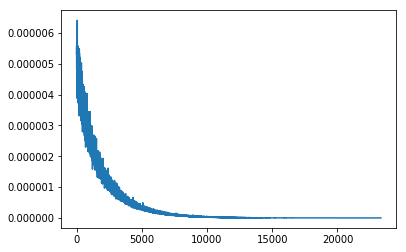

In [6]:
# 启动训练
fc_sizes=[128, 64, 32]
user_favorite_type, user_book_cat, user_gender_age_job =True, True, False
model = Model(user_favorite_type, user_book_cat, user_gender_age_job,fc_sizes)
losses =train(model)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

### 特征保存
保存训练的模型特征过程：\
1、创建用户特征字典和图书特征字典；\
2、遍历数据读取器里的数据提取出用户信息和图书信息；\
3、把需要转换的用户信息和图书信息转化为TENSOR类型；\
4、调用图书模型或用户模型把TENSO类型的图书和用户信息提取成向量特征；\
5、使用Pickle库的dump函数以二进制的方式把未经过训练的或经过训练的用户特征向量和未经过训练的或经过训练图书特征向量参照训练好的模型参数以字典的形式保存到文件中。\
保存特征的函数图下所示：

### 保存特征完整代码

In [85]:
# 保存训练特征

# 加载第三方库Pickle，用来保存Python数据到本地
import pickle
# 定义特征保存函数
def get_user_book_features(model, params_file_path):
    paddle.set_device('cpu') 
    user_pkl = {}
    book_pkl = {}
    
    # 定义将list中每个元素转成tensor的函数
    def list2tensor(inputs, shape):
        inputs = np.reshape(np.array(inputs).astype(np.int64), shape)
        return paddle.to_tensor(inputs)

    # 加载模型参数到模型中，设置为验证模式eval（）
    model_state_dict = paddle.load(params_file_path)
    model.load_dict(model_state_dict)
    model.eval()
    # 获得整个数据集的数据
    dataset = model.Dataset.dataset

    for i in range(len(dataset)):
        # 获得用户数据，图书数据，评分数据  
        # 本案例只转换所有在样本中出现过的user和book，实际中可以使用业务系统中的全量数据
        user_info, book_info, score = dataset[i]['user_info'], dataset[i]['book_info'],dataset[i]['scores']
        userid = str(user_info['user_id'])
        bookid = str(book_info['book_id'])
        
        # 获得图书数据，计算得到图书特征，保存在book_pkl字典中
        if bookid not in book_pkl.keys():
            book_id_v = list2tensor(book_info['book_id'], [1])
            book_cat_v = list2tensor(book_info['book_cat'], [1, cat_size])
            # book_cat_v = np.reshape(np.array(book_info['book_cat']).astype(np.int64), [1, cat_size])

            book_in = [book_id_v, book_cat_v]
            book_feat = model.get_book_feat(book_in)

            book_pkl[bookid] = book_feat.numpy()

        # 获得用户数据，计算得到用户特征，保存在user_pkl字典中
        if userid not in user_pkl.keys():
            user_id_v = list2tensor(user_info['user_id'], [1])
            user_gender_v = list2tensor(user_info['gender'], [1])
            user_age_v = list2tensor(user_info['age'], [1])
            user_job_v = list2tensor(user_info['job'], [1])            
            favorite_type_v = list2tensor(user_info['favorite_type'], [1, 4])

            user_in = [user_id_v, user_gender_v,user_age_v, user_job_v, favorite_type_v]
            user_feat = model.get_user_feat(user_in)

            user_pkl[userid] = user_feat.numpy()
    
    print("已保存书籍特征数量：",len(book_pkl.keys()))    
    print("已保存用户特征数量：",len(user_pkl.keys()))
    # 保存特征到本地
    pickle.dump(user_pkl, open(user_train_feat, 'wb'))
    pickle.dump(book_pkl, open(book_train_feat, 'wb'))
    print("特征保存已完成")

param_path = "checkpoint/epoch9.pdparams"
get_user_book_features(model, param_path)

已保存书籍特征数量： 10687
已保存用户特征数量： 51416
特征保存已完成


# 图书推荐实现模块
利用保存的特征构建相似度矩阵完成推荐：计算用户特征和图书特征之间的余弦相似度。基于内容过滤的图书推荐会根据用户已经评了高分的图书来推荐图书，通过计算用户已评分图书特征和其他所有保存在文件中的图书特征之间的相似度，对所有计算得出的相似度进行排序，把相识度较高的几本图书作为推荐图书。基于协同过滤的图书推荐会根据相似用户或具有相似喜好用户的喜好图书进行推荐图书，通过计算需要图书推荐的用户特征和其他文件里保存的所有用户特征之间的相似度，对通过余弦相似度计算方式计算得出相似度进行排序，取相似度较大的几个用户所喜爱的书图作为推荐图书。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2bc56944f7284ff0b919df5d35d12976ddb835350877421a9049b716badb9235"></center>
<center><br>图5：图书推荐实现模块的流程图</br></center>
<br></br>

### 图书推荐实现完整代码

In [7]:
# 图书推荐方法

# 原始数据处理
book_info , _, _ = get_book_info(book_info_path, False)
user_info , _, _ = get_user_info(user_info_path, True)
rating_info = get_rating_info(rating_info_path)

max_user_id = len(user_info)

for user_id in rating_info:
    user_info[user_id]['preferred_books'] = []
    for book_id in rating_info[user_id]:
        user_info[user_id]['preferred_books'].append(book_id)
    # user_info[user_id]['preferred_books'].sort()
    if len(user_info[user_id]['preferred_books']) == 0:
        user_info[user_id]['preferred_books'].append(0)
    user_info[user_id]['preferred_books'] = user_info[user_id]['preferred_books'][:15]

user_raw_info , _, _ = get_user_info(user_info_path, False)

# 根据用户ID，找到已评分图书最高的前top个评分信息
def top_user_graded_books (user, top):
    # 获得评分过的图书ID
    user_rating_info = {}

    for key in rating_info.keys():
        if key == user :
            for book_id in rating_info[key] :
                user_rating_info[book_id] = rating_info[key][book_id]

    # 获得评分过的图书ID
    book_ids = list(user_rating_info.keys())

    if len(book_ids) < top: 
        top = len(book_ids)

    print("\n用户已评分过{}本图书 评分排行前{}的图书是: ".format(len(book_ids), top))

    # 选出ID为user评分最高的前top个图书
    ratings_tops = sorted(user_rating_info.items(), key=lambda item:item[1])[-top:]

    ratings_tops = list(reversed(ratings_tops))

    for k, score in ratings_tops:
        print("    图书ID: {}，评分是: {}, 图书信息: {}".format(k, score, book_info[k]))
    graded_books = []
    for ratings_top in ratings_tops:
        graded_books.append(ratings_top[0])
    return graded_books

# 基于内容过滤的图书推荐
def similarity_book_for_book_feat(user_id, book_id):
    # 读取图书和用户的特征
    book_feats = pickle.load(open(book_raw_feat, 'rb'))
    similarity_books = []

    cos_sims = []
    id_feat = book_feats[str(book_id)]

    # with dygraph.guard():
    paddle.disable_static()
    # 索引图书特征，计算和输入图书ID的特征的相似度
    for idx, key in enumerate(book_feats.keys()):
        book_feat = book_feats[key]
        book_feat = paddle.to_tensor(book_feat)
        book_id_feat = paddle.to_tensor(id_feat)
        # 计算余弦相似度
        sim = paddle.nn.functional.common.cosine_similarity(book_feat, book_id_feat)
    
        cos_sims.append(sim.numpy()[0])

        # 对相似度排序
    index = np.argsort(cos_sims)[-20:]
    index = list(reversed(index))

    for book_id in index:
        similarity_books.append(str(book_id + 1))
    
    for book_id in user_info[user_id]['preferred_books']:
        for similarity_book_id in similarity_books:
            if str(book_id) == similarity_book_id :
                similarity_books.remove(similarity_book_id)

    # 去除列表中相同的元素
    similarity_books = list(set(similarity_books))

    while len(similarity_books) > 10 :
        similarity_books.pop(random.randint(0,len(similarity_books)-1))

    print("\n 根据用户已评分图书推荐的图书有：")
    for book_id in similarity_books:
        print("    book_id:{}".format(book_info[book_id]))

# 根据相似用户的喜好推荐图书
def similarity_user_for_user(user_id):
    # 读取图书和用户的特征
    user_feats = pickle.load(open(user_raw_feat, 'rb'))
    user_id_feat = user_feats[str(user_id)]
    preferred_books= []
    cos_sims = []
    
    # with dygraph.guard():
    paddle.disable_static()
    # 索引图书特征，计算和输入用户ID的特征的相似度
    for idx, key in enumerate(user_feats.keys()):

        user_feat = user_feats[key]
        user_feat = paddle.to_tensor(user_feat)
        user_id_feat = paddle.to_tensor(user_id_feat)
        # 计算余弦相似度
        sim = paddle.nn.functional.common.cosine_similarity(user_feat, user_id_feat)
        
        cos_sims.append(sim.numpy()[0])
    # 对相似度排序
    index = np.argsort(cos_sims)[-6:]
    print("\n用户ID为 {} 的用户，相似用户是：".format(user_id))    
    index = list(reversed(index))

    for i in index: 
        if i == int(user_id)-1 :
            continue
        print("    user_id:{}".format(user_raw_info[list(user_feats.keys())[i]]))
        for graded_book in user_info[list(user_feats.keys())[i]]['preferred_books']:
            preferred_books.append(graded_book)

    # 去除列表中相同的元素
    preferred_books = list(set(preferred_books))

    while len(preferred_books) > 10 :
        preferred_books.pop(random.randint(0,len(preferred_books)-1))

    print("\n 根据相似用户的已评分图书推荐的图书有：")
    for book_id in preferred_books:
        print("    book_id:{}".format(book_info[book_id]))

# 相似爱好的用户
def similarity_user_for_user_preferred_books(user_id):
    preferred_books = []
    sims = []

    for i in user_info.keys():
        sim = difflib.SequenceMatcher(None,user_info[i]['preferred_books'],user_info[user_id]['preferred_books'])
        
        sims.append(sim.ratio())
    # 对相似度排序
    index = np.argsort(sims)[-6:]

    print("\n与用户{}有相似喜好的用户有：".format(user_id))

    index = list(reversed(index))

    for i in index: 
        if i == int(user_id)-1 :
            continue
        print("    user_id:{}".format(user_raw_info[list(user_info.keys())[i]]))
        for book_id in user_info[list(user_info.keys())[i]]['preferred_books']:
            preferred_books.append(book_id)

    # 去除列表中相同的元素
    preferred_books = list(set(preferred_books))
    # preferred_books.remove(0)

    while len(preferred_books) > 10 :
        preferred_books.pop(random.randint(0,len(preferred_books)-1))

    for book_id in user_info[user_id]['preferred_books']:
        for graded_book in preferred_books:
            if str(book_id) == graded_book :
                preferred_books.remove(book_id)

    # if len(preferred_books) > 3 :
    print("\n 根据有相似喜好的用户的喜好图书推荐的图书有：")
    for book_id in preferred_books:
        print("    book_id:{}".format(book_info[book_id]))


# 热门图书推荐
def hot_book_recommendation() :

    # 根据热门推荐的图书字典
    preferred_books_list = {}

    recommended_books = {}

    for user_id in rating_info.keys():
        for book_id in rating_info[user_id]:
            if rating_info[user_id][book_id] > 3:
                if book_id in preferred_books_list.keys():
                    preferred_books_list[book_id] += 1
                else:
                    preferred_books_list[book_id] = 1
    
    while len(recommended_books) < 30:

        max_num = 0

        for book_id in preferred_books_list.keys():
            max_num = max(max_num, preferred_books_list[book_id])

        del_id = []

        for book_id in preferred_books_list.keys():
            if preferred_books_list[book_id] == max_num:
                recommended_books[book_id] = preferred_books_list[book_id]
                del_id.append(book_id)

        for book_id in del_id:
            preferred_books_list.pop(book_id)
            
    print("\n 热门图书推荐：")
    for book_id in recommended_books.keys():
        print(book_info[book_id],"热度：",recommended_books[book_id])

# 通过训练模型得出的特征向量推荐图书
def recommend_book_for_user(user_id, top_k,user_feat_dir, book_feat_dir):
    # 读取图书和用户的特征
    user_feats = pickle.load(open(user_feat_dir, 'rb'))
    book_feats = pickle.load(open(book_feat_dir, 'rb'))
    user_feat = user_feats[str(user_id)]

    cos_sims = []
    
    # with dygraph.guard():
    paddle.disable_static()
    # 索引图书特征，计算和输入用户ID的特征的相似度
    for idx, key in enumerate(book_feats.keys()):
        book_feat = book_feats[key]
        user_feat = paddle.to_tensor(user_feat)
        book_feat = paddle.to_tensor(book_feat)
        # 计算余弦相似度
        sim = paddle.nn.functional.common.cosine_similarity(user_feat, book_feat)
        
        cos_sims.append(sim.numpy()[0])
    # 对相似度排序
    index = np.argsort(cos_sims)[-top_k:]
    
    index = list(reversed(index))

    print("\n 通过训练模型得出的特征向量推荐图书：")
    for i in index :
        print(book_info[list(book_feats.keys())[i]])

In [22]:
# 从相似度排序中获取top_k个结果推荐给用户
top_k= 20
top = 10

# 需要推荐图书用户ID
user_id = random.randint(1,max_user_id)
    
print("用户ID为 {} 的用户，用户信息为:{}  ".format(user_id, user_raw_info[str(user_id)]))

# 获取用户喜好
graded_books = top_user_graded_books(str(user_id), top)

用户ID为 39138 的用户，用户信息为:{'user_id': 39138, '性别': '男', '年龄': '66', '职业': '电子报/电子杂志编辑'}  

用户已评分过24本图书 评分排行前10的图书是: 
    图书ID: 62043，评分是: 5.0, 图书信息: {'book_id': 62043, '图书标题': '蒙塔莱诗选', '类别': ['文学', '诗歌', '诗', '意大利']}
    图书ID: 31636，评分是: 5.0, 图书信息: {'book_id': 31636, '图书标题': '后垮掉派诗选', '类别': ['外国文学', '美国', '诗歌', '诗']}
    图书ID: 50981，评分是: 5.0, 图书信息: {'book_id': 50981, '图书标题': '鲁达基、海亚姆、萨迪、哈菲兹作品选', '类别': ['文学', '外国文学', '诗歌', '诗']}
    图书ID: 60367，评分是: 5.0, 图书信息: {'book_id': 60367, '图书标题': '寂寞的人坐着看花', '类别': ['文学', '诗歌', '台湾', '诗']}
    图书ID: 34680，评分是: 5.0, 图书信息: {'book_id': 34680, '图书标题': '驶向拜占庭', '类别': ['文学', '外国文学', '诗歌', '诗']}
    图书ID: 53714，评分是: 5.0, 图书信息: {'book_id': 53714, '图书标题': '从彼得堡到斯德哥尔摩', '类别': ['文学', '外国文学', '诗歌', '诗']}
    图书ID: 62742，评分是: 5.0, 图书信息: {'book_id': 62742, '图书标题': '郭小川诗选', '类别': ['文学', '诗歌', '诗词', '诗']}
    图书ID: 2819，评分是: 5.0, 图书信息: {'book_id': 2819, '图书标题': '我们无法猜出的谜--狄金森选集', '类别': ['文学', '美国', '诗歌', '诗']}
    图书ID: 3573，评分是: 5.0, 图书信息: {'book_id': 3573, '图书标题': 

### 基于内容过滤的图书推荐——根据用户喜好图书推荐
基于内容过滤的图书推荐——根据用户已经评了高分的图书来推荐图书，通过计算用户已评分图书特征和其他所有保存在文件中的图书特征之间的相似度，对所有计算得出的相似度进行排序，把相识度较高的几本图书作为推荐图书。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/3ef9f92bb3ab42f59fc5de59b933beee943ad5fa3023417dbccb15bf4f62559f"></center>
<center><br>图6：根据用户喜好图书推荐的流程图</br></center>
<br></br>

In [23]:
# 根据用户喜好图书推荐
similarity_book_for_book_feat(str(user_id), graded_books[0])


 根据用户已评分图书推荐的图书有：
    book_id:{'book_id': 55773, '图书标题': '高迪', '类别': ['艺术', '设计', '建筑', '西班牙']}
    book_id:{'book_id': 6644, '图书标题': '诗经全译', '类别': ['文学', '诗歌', '国学', '诗']}
    book_id:{'book_id': 1770, '图书标题': '波德莱尔诗全集', '类别': ['文学', '诗歌', '法国', '诗']}
    book_id:{'book_id': 5493, '图书标题': '双子座建筑艺术丛书（全4种）', '类别': ['艺术', '建筑', '画册', '西班牙']}
    book_id:{'book_id': 57378, '图书标题': '一生要读的60首诗歌', '类别': ['文学', '诗歌', '2006', '随便看看']}
    book_id:{'book_id': 62043, '图书标题': '蒙塔莱诗选', '类别': ['文学', '诗歌', '诗', '意大利']}
    book_id:{'book_id': 2112, '图书标题': '高迪的房子', '类别': ['艺术', '设计', '建筑', '西班牙']}
    book_id:{'book_id': 43750, '图书标题': '另一種聲音', '类别': ['文学', '诗歌', '诗', '现当代']}
    book_id:{'book_id': 48029, '图书标题': '达利谈话录', '类别': ['艺术', '传记', '访谈', '西班牙']}
    book_id:{'book_id': 69734, '图书标题': '新诗经', '类别': ['诗歌', '诗', '非动态出', '中国新诗']}


### 基于协同过滤的图书推荐——根据相似用户的喜好图书进行推荐图书
基于协同过滤的图书推荐——根据相似用户的喜好图书进行推荐图书，通过计算需要图书推荐的用户特征和其他文件里保存的所有用户特征之间的相似度，对通过余弦相似度计算方式计算得出相似度进行排序，取相似度较大的几个用户所喜爱的图书作为推荐图书。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/bed149833d9341bd9ac4d1e3ec70c3f271afa1eb423b4c99814a9187bd137c30"></center>
<center><br>图7：根据相似用户的喜好图书进行推荐图书的流程图</br></center>
<br></br>

In [24]:
# 根据相似用户的喜好图书推荐
similarity_user_for_user(user_id)


用户ID为 39138 的用户，相似用户是：
    user_id:{'user_id': 50107, '性别': '男', '年龄': '66', '职业': '电子报/电子杂志编辑'}
    user_id:{'user_id': 25506, '性别': '男', '年龄': '66', '职业': '电子报/电子杂志编辑'}
    user_id:{'user_id': 4826, '性别': '男', '年龄': '66', '职业': '电子报/电子杂志编辑'}
    user_id:{'user_id': 26025, '性别': '男', '年龄': '66', '职业': '电子报/电子杂志编辑'}
    user_id:{'user_id': 34140, '性别': '男', '年龄': '66', '职业': '电子报/电子杂志编辑'}

 根据相似用户的已评分图书推荐的图书有：
    book_id:{'book_id': 24089, '图书标题': '让思想冲破牢笼', '类别': ['管理', '思维', '管理学', '创新']}
    book_id:{'book_id': 45209, '图书标题': '这，就是华尔街', '类别': ['小说', '传记', '金融', '投资']}
    book_id:{'book_id': 37895, '图书标题': '柔韧', '类别': ['管理', '商业', '思维', '经管']}
    book_id:{'book_id': 10733, '图书标题': '黎塞留传(全两册)', '类别': ['历史', '传记', '政治', '法国']}
    book_id:{'book_id': 17793, '图书标题': '日本包装百例', '类别': ['日本', '艺术', '设计', 'design']}
    book_id:{'book_id': 5051, '图书标题': '世界设计大师图典', '类别': ['艺术', '设计', '画册', 'design']}
    book_id:{'book_id': 56393, '图书标题': '我的废纸', '类别': ['艺术', '设计', '平面设计', '設計']}
    boo

### 基于协同过滤的图书推荐——根据有相似喜好的用户的喜好图书进行推荐图书
基于协同过滤的图书推荐——根据有相似喜好的用户的喜好图书进行推荐图书，通过计算用户的爱好特征和其他用户的喜好特征之间的相似度，对通过余弦相似度计算方式计算得出相似度进行排序，取喜好图书相似度较大的几个用户所喜爱的其他图书作为推荐图书。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/afef6c4084db4fadab665c9b6bcf219d6153ccd4159b4036b66f21c5c2a1efca"></center>
<center><br>图8：根据有相似喜好的用户的喜好图书进行推荐图书的流程图</br></center>
<br></br>

In [25]:
# 根据相似爱好用户的喜好图书推荐
similarity_user_for_user_preferred_books(str(user_id))


与用户39138有相似喜好的用户有：
    user_id:{'user_id': 43439, '性别': '男', '年龄': '34', '职业': '宠物美容师'}
    user_id:{'user_id': 17908, '性别': '男', '年龄': '61', '职业': '护士'}
    user_id:{'user_id': 15399, '性别': '男', '年龄': '67', '职业': '制程工程师'}
    user_id:{'user_id': 29438, '性别': '男', '年龄': '65', '职业': '陶瓷技师'}
    user_id:{'user_id': 38219, '性别': '男', '年龄': '39', '职业': '木雕工'}

 根据有相似喜好的用户的喜好图书推荐的图书有：
    book_id:{'book_id': 28717, '图书标题': '飞鸟集(中英对照)/大家译丛', '类别': ['文学', '外国文学', '诗歌', '诗']}
    book_id:{'book_id': 62742, '图书标题': '郭小川诗选', '类别': ['文学', '诗歌', '诗词', '诗']}
    book_id:{'book_id': 50981, '图书标题': '鲁达基、海亚姆、萨迪、哈菲兹作品选', '类别': ['文学', '外国文学', '诗歌', '诗']}
    book_id:{'book_id': 24520, '图书标题': '雷聲與蟬鳴', '类别': ['文学', '诗歌', '香港', '诗']}
    book_id:{'book_id': 31109, '图书标题': '游思集', '类别': ['文学', '外国文学', '诗歌', '诗']}
    book_id:{'book_id': 60617, '图书标题': '秀发遭劫记', '类别': ['文学', '外国文学', '诗歌', '诗']}
    book_id:{'book_id': 29800, '图书标题': '新诗一百句', '类别': ['文学', '中国文学', '诗歌', '诗']}
    book_id:{'book_id': 19469, '图书

### 根据训练模型的结果推荐图书
根据训练模型的结果推荐图书，通过计算经过训练的用户特征和其他所有保存在文件中训练过的图书特征之间的相似度，对所有计算得出的相似度进行排序，把相识度较高的几本图书作为推荐图书。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/9f85a7ddf0ee47209fdf865400d4d7451711206a57bf4066bdff208aab588da9"></center>
<center><br>图9：根据训练模型的结果推荐图书的流程图</br></center>
<br></br>

In [26]:
# 通过训练模型得出的特征向量推荐图书
recommend_book_for_user(user_id, top_k, user_train_feat, book_train_feat)


 通过训练模型得出的特征向量推荐图书：
{'book_id': 19379, '图书标题': '心藏大恶', '类别': ['中国', '诗歌', '诗', '中国当代文学']}
{'book_id': 14707, '图书标题': '被遗忘的经典诗歌（上下）', '类别': ['文学', '经典', '诗歌', '诗']}
{'book_id': 51252, '图书标题': '自由诗篇', '类别': ['文学', '经典', '诗歌', '诗']}
{'book_id': 8692, '图书标题': '人一生要读的60首诗歌', '类别': ['文学', '经典', '诗歌', '诗']}
{'book_id': 53274, '图书标题': 'The Best Poems of the English Language', '类别': ['文学', '诗歌', '诗', '英语']}
{'book_id': 31671, '图书标题': '被阉割的文明', '类别': ['历史', '中国', '社会', '社科']}
{'book_id': 38187, '图书标题': '中国30年', '类别': ['历史', '中国', '社会', '中国历史']}
{'book_id': 11176, '图书标题': '文化大革命简史', '类别': ['历史', '中国', '社会', '中国历史']}
{'book_id': 23125, '图书标题': '明朝十讲', '类别': ['历史', '中国', '社会', '中国历史']}
{'book_id': 6041, '图书标题': '观察中国', '类别': ['历史', '中国', '社会', '中国历史']}
{'book_id': 31460, '图书标题': '中国近代史', '类别': ['历史', '中国', '社会', '中国历史']}
{'book_id': 52593, '图书标题': '《仪礼》与《礼记》之社会学的研究', '类别': ['历史', '社会学', '人类学', '史学']}
{'book_id': 3182, '图书标题': '25年', '类别': ['历史', '中国', '社会', '中国历史']}
{'book_id': 14639, '图书标题': '中国历

### 热门图书推荐
热门图书推荐会把所有图书中最受欢迎的图书推荐给用户，通过统计所有用户喜爱的图书找出最受欢迎的图书作为推荐结果推荐给用户。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/992f4311c4e044358c6a9205ad99f5d697d46e005f0145a2a4c2fb1e4761b21f"></center>
<center><br>图10：热门图书推荐的流程图</br></center>
<br></br>

In [27]:
# 热门图书推荐
hot_book_recommendation()


 热门图书推荐：
{'book_id': 61208, '图书标题': 'たかみち画集', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 317
{'book_id': 42375, '图书标题': '带你去巴黎', '类别': ['外国文学', '随笔', '生活', '英国']} 热度： 316
{'book_id': 61206, '图书标题': 'Food Girls', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 315
{'book_id': 27563, '图书标题': 'formcode range murata 3rd drawing works limited edition 24+20', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 314
{'book_id': 25915, '图书标题': 'INNOCENCE―美樹本晴彦画集', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 313
{'book_id': 66548, '图书标题': '宫崎骏1968至2008年手稿', '类别': ['日本', '绘本', '画册', '画集']} 热度： 308
{'book_id': 31205, '图书标题': 'Yours', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 308
{'book_id': 14853, '图书标题': 'INOUE TAKEHIKO ILLUSTRATIONS', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 306
{'book_id': 35434, '图书标题': '山田章博の世界―ミスティックアークアートワークス', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 306
{'book_id': 34029, '图书标题': '陰陽師 天野喜孝コンセプトデザイン集', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 304
{'book_id': 64457, '图书标题': '殉教者のためのディヴェルティメント', '类别': ['日本', '漫画', '绘本', '画集']} 热度： 303
{